In [145]:
Pkg.add("PyPlot")
Pkg.build("PyPlot")
using PyPlot

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Building PyCall
INFO: PyCall is using /usr/bin/python (Python 2.7.6) at /usr/bin/python, libpython = libpython2.7


In [146]:
data = readdlm("binary.csv",',','\r');

In [147]:
y = data[:,1];
u = data[:,2:4];
o = ones(size(u,1));
u = [u o];
m = size(y,1);

In [148]:
function L(a)
    val = 0
    for i=1:m
        val = val - y[i]*(dot(a,squeeze(u[i,:],1))) + log(1 + exp(dot(a,squeeze(u[i,:],1))));
    end
    return val
end

L (generic function with 1 method)

In [149]:
function gradL(a)
    grad = zeros(4);
    for i = 1:m
        grad = grad + (((exp(dot(a,squeeze(u[i,:],1))))/(1+exp(dot(a,squeeze(u[i,:],1))))) - y[i])*squeeze(u[i,:],1);
    end
    return grad
end

gradL (generic function with 1 method)

In [150]:
nu = 10^-8.0;

In [ ]:
M = 1
a = randn(4);
its = 0;
Lvals = []
gradNormVals =[]
initGrad = norm(gradL(a),2)
while norm(gradL(a),2) > nu && norm(gradL(a),2) > 10^-16.0 * initGrad
    while L(a - (1/M)*gradL(a))[1] < L(a)[1] - (1/2M)*norm(gradL(a),2)^2
        M = .8M;
    end
    while L(a - (1/M)*gradL(a))[1] > L(a)[1] - (1/2M)*norm(gradL(a),2)^2
        M = 1.1*M;
    end
    if L(a-(1/M)*gradL(a)) > L(a)
        println("bad news at its: ", its)
    end
    a = a - (1/M)*gradL(a);
    its = its + 1;
    Lvals = [Lvals, L(a)]
    gradNormVals= [gradNormVals, norm(gradL(a),2)]
    println("it: ", its, " objective: ", L(a), " grad norm: ", norm(gradL(a),2))
end

it: 1 objective: 13393.084147969033 grad norm: 156484.56163023258
it: 2 objective: 2626.107353051254 grad norm: 78560.601473023
it: 3 objective: 870.3868608471504 grad norm: 115512.66669469874
it: 4 objective: 532.0684807539078 grad norm: 6140.145346998739
it: 5 objective: 531.0276705004231 grad norm: 304.60664330148813
it: 6 objective: 531.0229983972112 grad norm: 251.89434020737562
it: 7 objective: 531.0180226699708 grad norm: 325.72169900171065
it: 8 objective: 531.0131517606003 grad norm: 240.55191482845106
it: 9 objective: 531.0077236443017 grad norm: 338.7950171704922
it: 10 objective: 531.0026977827791 grad norm: 232.24298378831034
it: 11 objective: 530.9965912306812 grad norm: 399.7598619012652
it: 12 objective: 530.9905092293245 grad norm: 220.3594240503651
it: 13 objective: 530.9823747239423 grad norm: 453.1325537958905
it: 14 objective: 530.9750976604678 grad norm: 215.34255537282095
it: 15 objective: 530.9649722236782 grad norm: 532.6679956677306
it: 16 objective: 530.95557

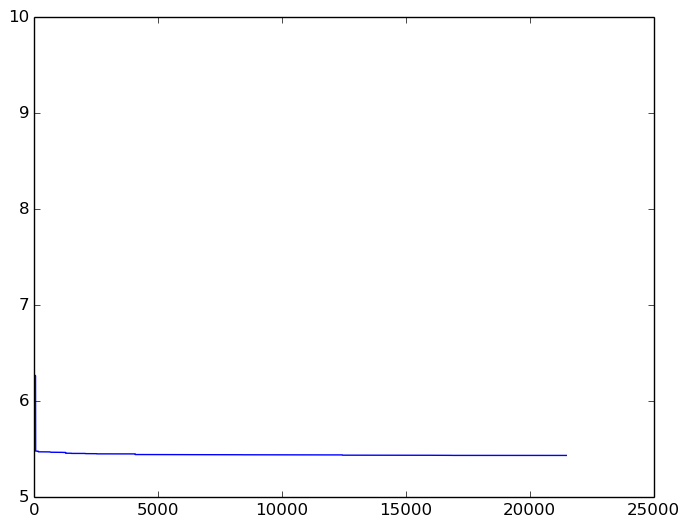

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f51912e1e50>

In [156]:
plot(1:size(Lvals,1),log(Lvals))

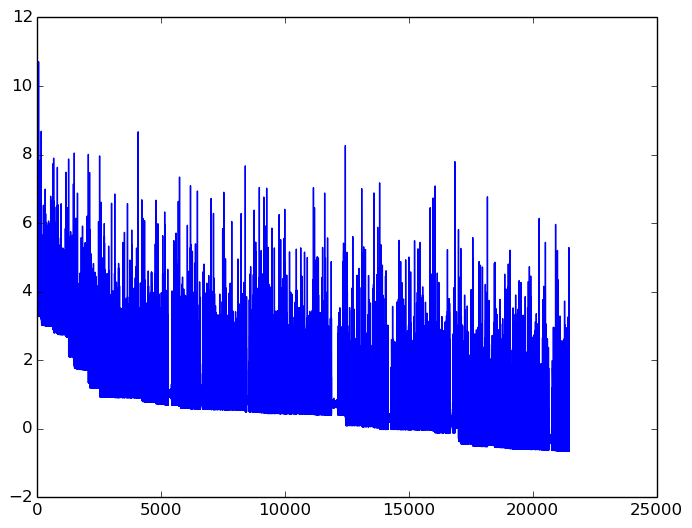

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f5191284f90>

In [157]:
plot(1:size(gradNormVals,1),log(gradNormVals))

In [158]:
a

4-element Array{Float64,1}:
  0.00215197
  0.619811  
 -0.57805   
 -2.77562   

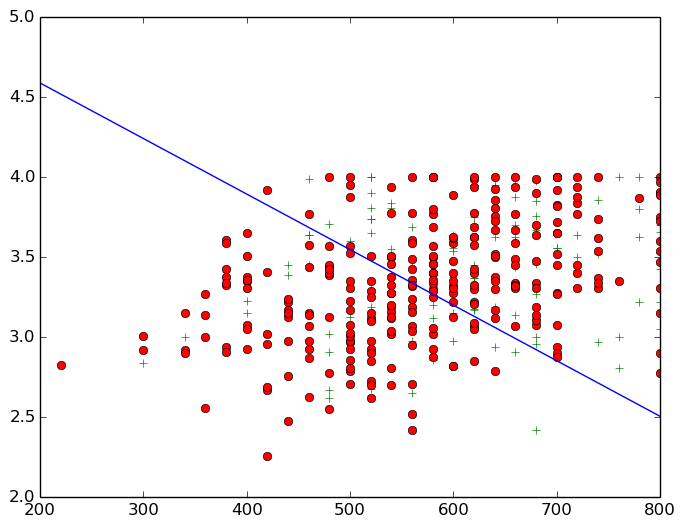

3-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f518fdc0850>
 PyObject <matplotlib.lines.Line2D object at 0x7f518fdc0a90>
 PyObject <matplotlib.lines.Line2D object at 0x7f518fd4e150>

In [184]:
yes=[transpose(zeros(4))];
no=[transpose(zeros(4))];
for i = 1:m
    if y[i]==1
        yes = [yes; u[i,:]];
    end
    if y[i] == 0
        no = [no; u[i,:]];
    end
end
ym = size(yes,1)
nm = size(no,1)
gre=200:600/300:800
gpa=2.2:1.8/300:4.0
plot(yes[2:end,1],yes[2:end,2],"g+", no[2:end,1],no[2:end,2],"ro",gre,((1/2) - a[1]*gre - a[4])/a[2])